# Importing Libraries

In [ ]:
! pip install graphviz

In [ ]:
! pip install pydotplus

In [ ]:
! pip install mlrose

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Visualize
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from sklearn.externals.six import StringIO 


from IPython.display import Image  
import pydotplus

# Reading Data

In [ ]:
df_titanic = pd.read_csv('/content/drive/MyDrive/Data Mining/HW2/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess

## Part a

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Part b

In [ ]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0], inplace=True)
df_titanic.dropna(axis=0, inplace=True)

In [ ]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Part c

In [ ]:
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1


## Part d

### Method 1

In [ ]:
def func(row):
  if row.Age < 10:
    return 'child'
  else:
    return row.Sex
    
df_titanic['Age'] = df_titanic.apply(func, axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,female,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,female,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,male,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,child,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,female,0,0,113783,26.5500,C103,S,1


## Part e

In [ ]:
df_titanic.drop(['Parch', 'SibSp', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Mutual Information

## Part f

In [39]:
def entropy(x):
  m = np.sum(x.value_counts())
  return -np.sum([(i/m) * np.log2(i/m) for i in x.value_counts()])

def mutual_info(x, y, df):
  return entropy(df[x]) + entropy(df[y]) - entropy(df[[x, y]])


## Part g

In [56]:
ls = list(df_titanic.columns)
ls.remove('Survived')

for i in ls:
  print(f"Mutual Information between {i} and Survived : {mutual_info('Survived', i, df_titanic)}")

Mutual Information between Pclass and Survived : 0.010988241218412798
Mutual Information between Sex and Survived : 0.24419845466309664
Mutual Information between Age and Survived : 0.2898189859945457
Mutual Information between Fare and Survived : 0.5477869667727555
Mutual Information between Cabin and Survived : 0.730723959022674
Mutual Information between Embarked and Survived : 0.013801616730082511
Mutual Information between FamilySize and Survived : 0.026781784878537884


The most related feature to Survived is : Cabin  
The least related feature to Survived is : Pclass

# Setup

## Part h

### Method1: Get dummies

In [57]:
df_titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
1,1,1,female,female,71.2833,C85,C,2
3,1,1,female,female,53.1000,C123,S,2
6,0,1,male,male,51.8625,E46,S,1
10,1,3,female,child,16.7000,G6,S,3
11,1,1,female,female,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...
871,1,1,female,female,52.5542,D35,S,3
872,0,1,male,male,5.0000,B51 B53 B55,S,1
879,1,1,female,female,83.1583,C50,C,2
887,1,1,female,female,30.0000,B42,S,1


In [58]:
# Categorical features: Sex, Embarked
df_titanic = pd.get_dummies(df_titanic, columns = ['Embarked', 'Sex', 'Cabin', 'Age'])
df_titanic.head()

,Survived,Pclass,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Age_child,Age_female,Age_male
1,1,1,71.2833,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,53.1000,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,51.8625,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10,1,3,16.7000,3,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
11,1,1,26.5500,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Method2: Sklearn OneHot encoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_titanic.loc[:, ['Sex', 'Embarked']])

main_df = df_titanic[['Survived', 'Pclass', 'Fare', 'FamilySize']]

codes = enc.transform(df_titanic.loc[:, ['Sex', 'Embarked', 'Age', 'Cabin']]).toarray()
feature_names = enc.get_feature_names(['Sex', 'Embarked'])

enc_df = pd.concat([main_df, pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)
enc_df.head()

## Part i

In [59]:
X = df_titanic.loc[:, df_titanic.columns!='Survived']
y = df_titanic.loc[:, 'Survived']

In [60]:
X.shape, y.shape

((204, 158), (204,))

## Part j

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 158), (62, 158), (142,), (62,))

# Decision Tree

## Part k

In [62]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [63]:
## Train Accuracy
clf.score(X_train, y_train)

1.0

In [64]:
## Test Accuracy
accuracy_score(y_pred, y_test)

0.8387096774193549

## Part l

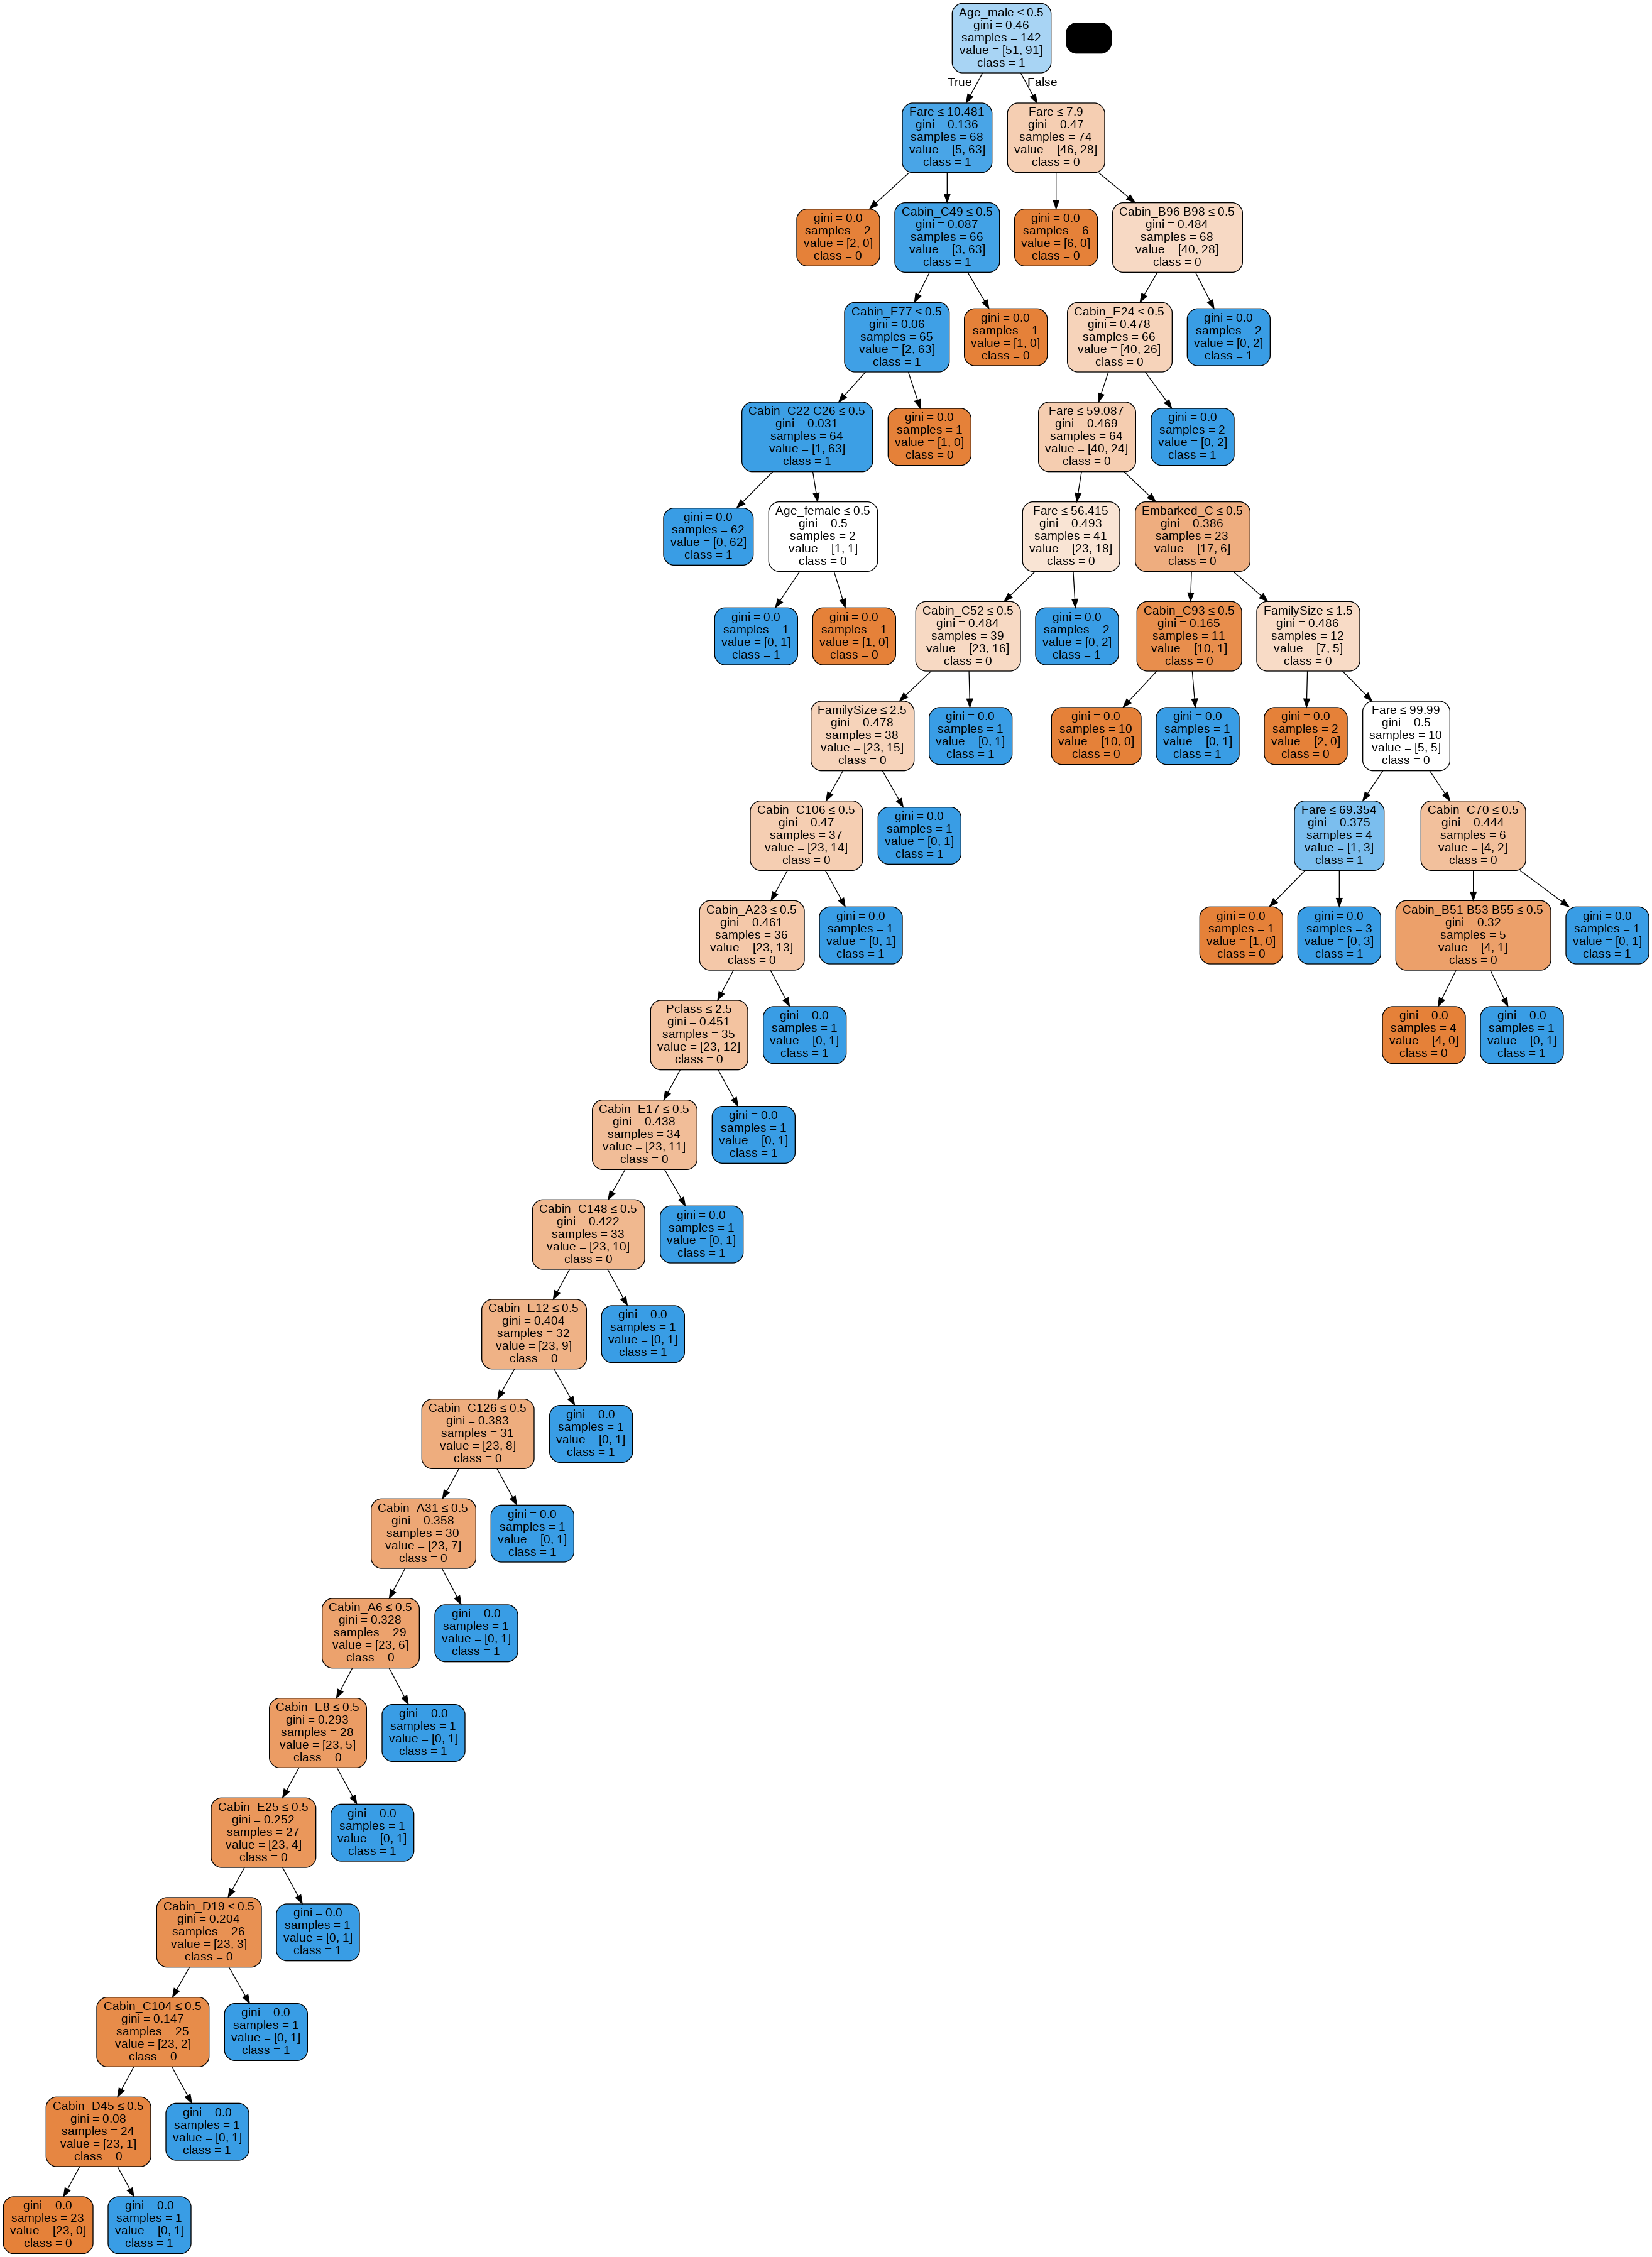

In [ ]:
data = StringIO()
export_graphviz(clf, out_file=data, filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

## Part m --> Refer to the PDF file

## Part n

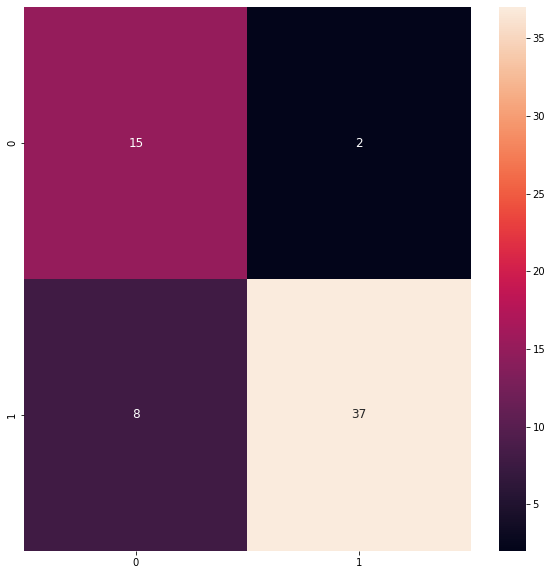

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(confusion, annot=True, annot_kws={"size": 12}) # font size
plt.show()

# Hyper Parameters Tunning

## Part o

In [73]:
hyper_paramater_dict = {'max_depth':range(2, 20), 'min_samples_leaf':range(1, 12)}

In [74]:
grid = GridSearchCV(clf, param_grid=hyper_paramater_dict, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 12)},
             verbose=1)

In [75]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [76]:
grid.best_score_

0.7682266009852217

In [77]:
y_pred = grid.best_estimator_.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8064516129032258


## Part p

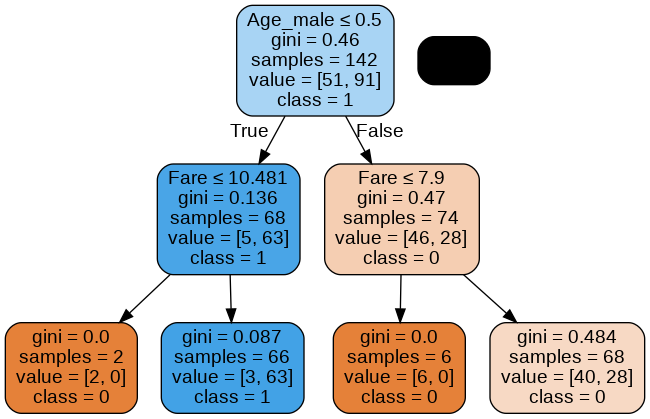

In [79]:
data = StringIO()
export_graphviz(grid.best_estimator_, out_file=data, filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())  
graph.write_png('titanic_best.png')
Image(graph.create_png())

# Random Forest

### Part q

In [80]:
random_forest = RandomForestClassifier(random_state=0, oob_score=True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=0)

### Part r

In [81]:
## Training Score
random_forest.oob_score_

0.7253521126760564

In [82]:
## Training Score
random_forest.score(X_train, y_train)

1.0

In [83]:
## Test Accuracy
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8387096774193549


### Part s

In [ ]:
param_dict_random = {
'min_samples_split': list(range(2, 20)),
'max_depth': list(range(2, 20)),
'bootstrap': [True, False],
'min_samples_leaf': list(range(1, 50)),
'n_estimators': list(range(50, 300, 10)),
'criterion': ['gini', 'entropy'] 
}

In [ ]:
model_random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dict_random, n_iter=50)
model_random_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib

RandomizedSearchCV(estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=0),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27,

In [ ]:
model_random_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 110}

In [ ]:
model_random_search.best_score_

0.6758620689655173

In [ ]:
y_pred_random = model_random_search.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(accuracy_random)

0.7580645161290323


### Part t --> Refer to the PDF file

# Achieving accuracy more than 85%

In [ ]:
df_titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
1,1,1,38.0,71.2833,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,53.1000,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,54.0,51.8625,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1,3,4.0,16.7000,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
11,1,1,58.0,26.5500,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Ensemble model (KNN + XGboost + SVC)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
from collections import Counter
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
estimators = []

model1 = KNeighborsClassifier(leaf_size=100,algorithm='auto',metric = 'minkowski', n_neighbors = 15,p=12, weights = 'distance')
estimators.append(('KNeighborsClassifier', model1))

model2 = XGBClassifier(learning_rate = 0.39, max_depth = 2, n_estimators = 53)
estimators.append(('XGBClassifier', model2))
model3 = SVC(C = 89, gamma = 1.1, kernel = 'rbf')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
# results = cross_val_score(ensemble, X, label_encoded_y, cv=kfold)
# print(results.mean() ,results.std())

In [ ]:
ensemble.fit(X_train, y_train)
predict_ensemble = ensemble.predict(X_test)
print(accuracy_score(predict_ensemble, y_test))

0.7276119402985075


## Lets not remove missing values of cabin and fill them with something else

In [ ]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0], inplace=True)
df_titanic['Cabin'].fillna("unknow")

0      unknow
1         C85
2      unknow
3        C123
4      unknow
        ...  
886    unknow
887       B42
888    unknow
889      C148
890    unknow
Name: Cabin, Length: 891, dtype: object

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df_titanic = pd.get_dummies(df_titanic, columns = ['Embarked', 'Sex', 'Cabin'])
df_titanic

,Survived,Pclass,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,3,22.0,7.2500,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,71.2833,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,53.1000,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_titanic.loc[:, df_titanic.columns!='Survived']
y = df_titanic.loc[:, 'Survived']

In [ ]:
X.shape, y.shape

((891, 156), (891,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 156), (268, 156), (623,), (268,))

In [ ]:
random_forest = RandomForestClassifier(random_state=0, oob_score=True, max_depth=8, n_estimators=120)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=120, oob_score=True,
                       random_state=0)

In [ ]:
'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 110}

In [ ]:
## Training Score
random_forest.oob_score_

0.8298555377207063

In [ ]:
## Training Score
random_forest.score(X_train, y_train)

0.8764044943820225

In [ ]:
## Test Accuracy
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8134328358208955


## Neural Network

In [ ]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(units = 1024, input_shape = (156,), activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units =1 , activation = 'sigmoid'))

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, y_train, batch_size = 32, verbose = 2, epochs = 70)

Epoch 1/100
20/20 - 2s - loss: 0.3568 - acc: 0.8571 - 2s/epoch - 100ms/step
Epoch 2/100
20/20 - 0s - loss: 0.4120 - acc: 0.8250 - 401ms/epoch - 20ms/step
Epoch 3/100
20/20 - 0s - loss: 0.3730 - acc: 0.8507 - 459ms/epoch - 23ms/step
Epoch 4/100
20/20 - 1s - loss: 0.3276 - acc: 0.8652 - 648ms/epoch - 32ms/step
Epoch 5/100
20/20 - 1s - loss: 0.3298 - acc: 0.8587 - 545ms/epoch - 27ms/step
Epoch 6/100
20/20 - 0s - loss: 0.3297 - acc: 0.8780 - 302ms/epoch - 15ms/step
Epoch 7/100
20/20 - 0s - loss: 0.3163 - acc: 0.8716 - 293ms/epoch - 15ms/step
Epoch 8/100
20/20 - 0s - loss: 0.3160 - acc: 0.8716 - 299ms/epoch - 15ms/step
Epoch 9/100
20/20 - 0s - loss: 0.3253 - acc: 0.8684 - 292ms/epoch - 15ms/step
Epoch 10/100
20/20 - 0s - loss: 0.3193 - acc: 0.8732 - 297ms/epoch - 15ms/step
Epoch 11/100
20/20 - 0s - loss: 0.3331 - acc: 0.8668 - 293ms/epoch - 15ms/step
Epoch 12/100
20/20 - 0s - loss: 0.3100 - acc: 0.8748 - 298ms/epoch - 15ms/step
Epoch 13/100
20/20 - 0s - loss: 0.3139 - acc: 0.8700 - 296ms/ep

In [ ]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(accuracy_score(predict, y_test))

0.7835820895522388


## NN + XGboost

In [ ]:
model = Sequential()
model.add(Dense(units = 1024, input_shape = (156,), activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units =1 , activation = 'sigmoid'))

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, y_train, batch_size = 32, verbose = 2, epochs = 80)

Epoch 1/80
20/20 - 2s - loss: 0.6383 - acc: 0.6453 - 2s/epoch - 111ms/step
Epoch 2/80
20/20 - 0s - loss: 0.6220 - acc: 0.6838 - 395ms/epoch - 20ms/step
Epoch 3/80
20/20 - 0s - loss: 0.6017 - acc: 0.6597 - 392ms/epoch - 20ms/step
Epoch 4/80
20/20 - 0s - loss: 0.5661 - acc: 0.6966 - 406ms/epoch - 20ms/step
Epoch 5/80
20/20 - 0s - loss: 0.5475 - acc: 0.7303 - 432ms/epoch - 22ms/step
Epoch 6/80
20/20 - 1s - loss: 0.5516 - acc: 0.7352 - 704ms/epoch - 35ms/step
Epoch 7/80
20/20 - 1s - loss: 0.5226 - acc: 0.7673 - 576ms/epoch - 29ms/step
Epoch 8/80
20/20 - 0s - loss: 0.4797 - acc: 0.7929 - 441ms/epoch - 22ms/step
Epoch 9/80
20/20 - 0s - loss: 0.4712 - acc: 0.8010 - 438ms/epoch - 22ms/step
Epoch 10/80
20/20 - 0s - loss: 0.4690 - acc: 0.7913 - 416ms/epoch - 21ms/step
Epoch 11/80
20/20 - 0s - loss: 0.4607 - acc: 0.8010 - 336ms/epoch - 17ms/step
Epoch 12/80
20/20 - 0s - loss: 0.4513 - acc: 0.8106 - 310ms/epoch - 16ms/step
Epoch 13/80
20/20 - 0s - loss: 0.4710 - acc: 0.8010 - 294ms/epoch - 15ms/st

In [ ]:
model.pop()

In [ ]:
X_input_xgb = model.predict(X_train)
X_input_xgb.shape

(623, 16)

In [ ]:
X_input_xgb_test = model.predict(X_test)
X_input_xgb_test.shape

(268, 16)

In [ ]:
model2 = XGBClassifier(learning_rate = 0.39, max_depth = 3, n_estimators = 53)

In [ ]:
model2.fit(X_input_xgb, y_train)
y_pred = model2.predict(X_input_xgb_test)
print(accuracy_score(y_pred, y_test))

0.7985074626865671
